In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from utils.visualization import plot_animal_locations
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Aggregate Plots

In [29]:
# def visualize_algorithm_performance(
#     do_df, rm_df, rmp_df, prmp_df,
#     num_timesteps=None, num_attackers=None, num_defenders=None,
#     num_targets=None, dims=None, dt=None, fr=None,
#     log_time=False
# ):
#     # Filter DO dataframe for the specified parameter setting
#     filters = []
#     if num_timesteps is not None:
#         filters.append(do_df["num_timesteps"] == num_timesteps)
#     if num_attackers is not None:
#         filters.append(do_df["num_attackers"] == num_attackers)
#     if num_defenders is not None:
#         filters.append(do_df["num_defenders"] == num_defenders)
#     if num_targets is not None:
#         filters.append(do_df["num_clusters"] == num_targets)  # Assuming num_targets ≈ num_clusters
#     if dims is not None:
#         filters.append(do_df["dims"] == dims)
#     if dt is not None:
#         filters.append(do_df["defense_time_threshold"] == dt)
#     if fr is not None:
#         filters.append(do_df["force_return"] == fr)

#     if filters:
#         mask = filters[0]
#         for f in filters[1:]:
#             mask &= f
#         do_df_filtered = do_df[mask]
#     else:
#         do_df_filtered = do_df.copy()

#     # Plot 1: Gap over time for DO
#     plt.figure(figsize=(10, 6))
#     for key, grp in do_df_filtered.groupby(["num_timesteps", "num_attackers", "num_defenders", "num_clusters", "dims", "defense_time_threshold", "force_return"]):
#         plt.plot(grp["iteration_time"].cumsum(), grp["gap"], label=f"DO: {key}")
#     plt.xlabel("Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Double Oracle Gap over Time")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # # Plot 2: Defender support size at convergence (DO only)
#     # plt.figure(figsize=(10, 6))
#     # do_summary = do_df_filtered.groupby([
#     #     "num_timesteps", "num_attackers", "num_defenders",
#     #     "num_clusters", "dims", "defense_time_threshold", "force_return"
#     # ]).agg({"def_support": "max"}).reset_index()
#     # plt.bar(range(len(do_summary)), do_summary["def_support"])
#     # plt.xticks(range(len(do_summary)), labels=[str(t) for t in do_summary[["num_timesteps", "num_attackers", "num_defenders"]].values], rotation=45)
#     # plt.ylabel("Defender Support Size")
#     # plt.title("Defender Support Size at Convergence (DO)")
#     # plt.grid(True)
#     # plt.tight_layout()
#     # plt.show()

#     # Plot 3: Comparison of RM, RM+, PRM+ gap trajectories
#     plt.figure(figsize=(10, 6))
#     for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
#         times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
#         gaps = df.groupby("interval_number")["gaps"].mean()
#         plt.plot(times, gaps, label=label)

#     plt.xlabel("Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Gap Over Time (RM, RM+, PRM+)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot 4: Comparison of DO vs RM, RM+, PRM+ on filtered instance
#     plt.figure(figsize=(10, 6))

#     if not do_df_filtered.empty:
#         do_instance = do_df_filtered.groupby("iteration_number")[["iteration_time", "gap"]].mean()
#         do_instance["cumulative_time"] = do_instance["iteration_time"].cumsum()
#         x_do = do_instance["cumulative_time"]
#         y_do = do_instance["gap"]
#         if log_time:
#             x_do = np.log1p(x_do)
#         plt.plot(x_do, y_do, label="DO", linestyle='--')

#     for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
#         times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
#         gaps = df.groupby("interval_number")["gaps"].mean()
#         x_rm = np.log1p(times) if log_time else times
#         plt.plot(x_rm, gaps, label=label)

#     plt.xlabel("Log Cumulative Time (s)" if log_time else "Cumulative Time (s)")
#     plt.ylabel("Gap")
#     plt.title("Comparison of DO vs RM Variants on Fixed Game Instance")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [34]:
def visualize_algorithm_performance(
    do_df, rm_df, rmp_df, prmp_df,
    num_timesteps=None, num_attackers=None, num_defenders=None,
    num_targets=None, dims=None, dt=None, fr=None,
    log_time=False
):
    # Filter DO dataframe for the specified parameter setting
    filters = []
    if num_timesteps is not None:
        filters.append(do_df["num_timesteps"] == num_timesteps)
    if num_attackers is not None:
        filters.append(do_df["num_attackers"] == num_attackers)
    if num_defenders is not None:
        filters.append(do_df["num_defenders"] == num_defenders)
    if num_targets is not None:
        filters.append(do_df["num_clusters"] == num_targets)  # Assuming num_targets ≈ num_clusters
    if dims is not None:
        filters.append(do_df["dims"] == dims)
    if dt is not None:
        filters.append(do_df["defense_time_threshold"] == dt)
    if fr is not None:
        filters.append(do_df["force_return"] == fr)

    if filters:
        mask = filters[0]
        for f in filters[1:]:
            mask &= f
        do_df_filtered = do_df[mask]
    else:
        do_df_filtered = do_df.copy()

    # Plot 4: Comparison of DO vs RM, RM+, PRM+ on filtered instance
    plt.figure(figsize=(10, 6))

    if not do_df_filtered.empty:
        do_instance = do_df_filtered.groupby("iteration_number")[["iteration_time", "gap"]].mean()
        do_instance["cumulative_time"] = do_instance["iteration_time"].cumsum()
        x_do = do_instance["cumulative_time"]
        y_do = do_instance["gap"]

        if log_time:
            plt.xscale('log')

        plt.plot(x_do, y_do, label="DO", linestyle='--')

    for df, label in zip([rm_df, rmp_df, prmp_df], ["RM", "RM+", "PRM+"]):
        times = df.groupby("interval_number")["iteration_times"].mean().cumsum()
        gaps = df.groupby("interval_number")["gaps"].mean()

        # Insert a (0, starting_gap) point to align to 0
        times = np.insert(times.values, 0, 0)
        gaps = np.insert(gaps.values, 0, gaps.values[0])  # start from the first gap value

        if log_time:
            plt.xscale('log')

        plt.plot(times, gaps, label=label)

    plt.xlabel("Cumulative Time (s)" if not log_time else "Log Cumulative Time (s)")
    plt.ylabel("Gap")
    plt.title("Comparison of DO vs RM Variants on Fixed Game Instance")
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [35]:
do_df = pd.read_csv("GSG_NFG_DO_MASS_FINAL.csv",header=0,index_col=0)
rm_df = pd.read_csv("GSG_NFG_RM_FINAL_WITH_FR_DT.csv",header=0,index_col=0)
rmp_df = pd.read_csv("GSG_NFG_RMP_FINAL_WITH_FR_DT.csv",header=0,index_col=0)
prmp_df = pd.read_csv("GSG_NFG_PRMP_FINAL_WITH_FR_DT.csv",header=0,index_col=0)

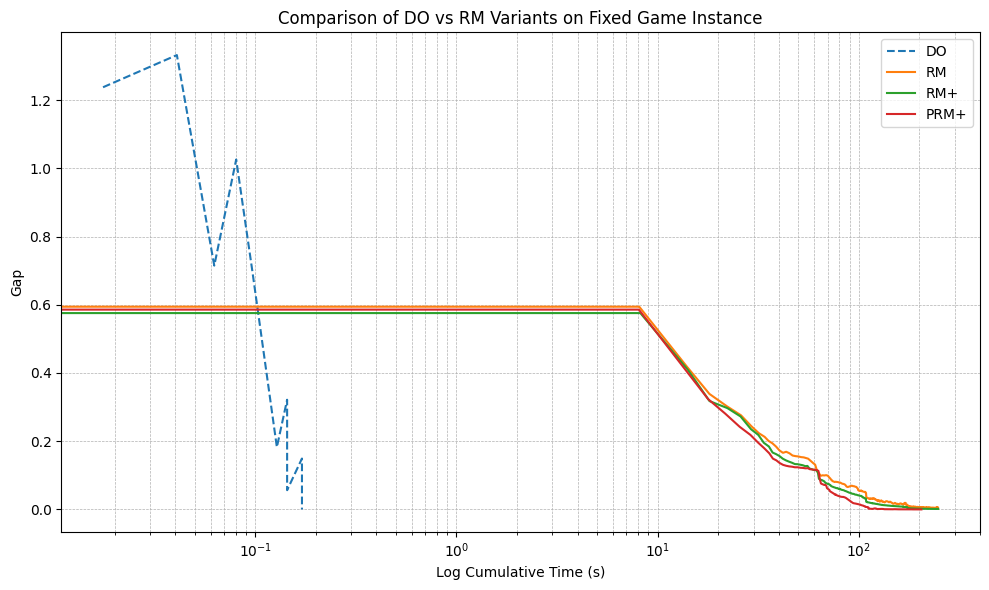

In [36]:
# visualize_algorithm_performance(do_df, rm_df, rmp_df, prmp_df, num_timesteps=9, num_attackers=1, num_defenders=1,
#     num_targets=10, dims=7, dt=1, fr=False, log_time=True)
visualize_algorithm_performance(do_df, rm_df, rmp_df, prmp_df, num_timesteps=7, num_attackers=3, num_defenders=1,
    num_targets=10, dims=7, dt=1, fr=False, log_time=True)

# Cover Figures

In [16]:
df = pd.read_csv("lobeke.csv")

In [17]:
df

,animal_id,lat,long,timestamp
0,14118,2.476,15.769,2002-03-30 00:00:00.000
1,14118,2.502,15.740,2002-03-31 00:00:00.000
2,14118,2.506,15.744,2002-03-31 00:00:00.000
3,14118,2.507,15.747,2002-03-31 00:00:00.000
4,14118,2.479,15.771,2002-04-01 00:00:00.000
...,...,...,...,...
3178,46179,2.288,16.008,2004-08-11 01:37:19.000
3179,46179,2.286,16.007,2004-08-11 04:01:10.000
3180,46179,2.274,16.039,2004-08-11 06:55:32.000
3181,46179,2.297,16.012,2004-08-12 01:27:37.000


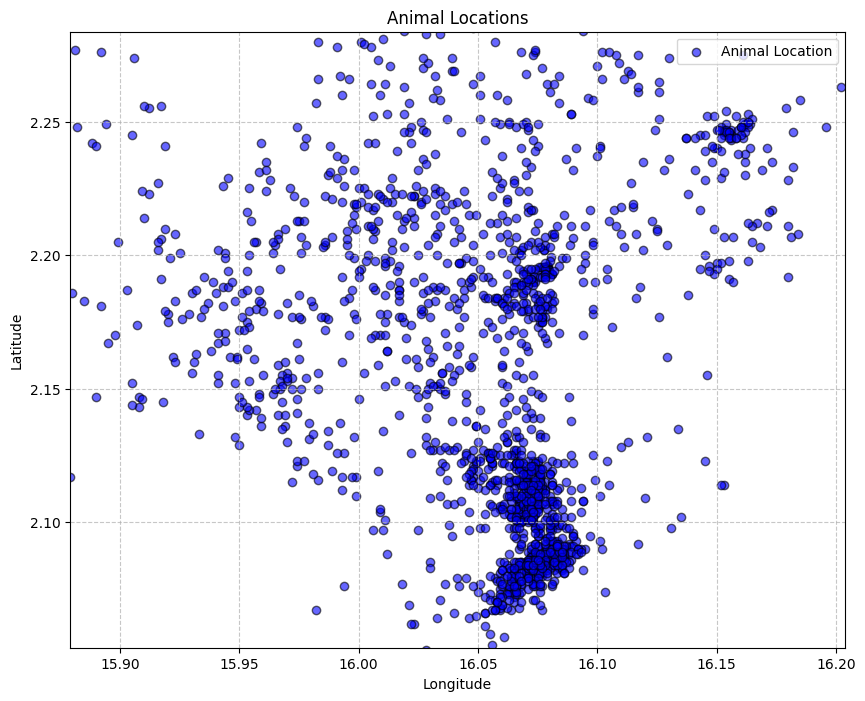

In [18]:
lat_min, lon_min = 2.0530, 15.8790
lat_max, lon_max = 2.2837, 16.2038

coordinate_rectangle = [lat_min, lat_max, lon_min, lon_max]

plot_animal_locations(df, coordinate_rectangle)

In [20]:
df_filtered = df[df["lat"]>=lat_min]
df_filtered = df_filtered[df_filtered["lat"]<=lat_max]
df_filtered = df_filtered[df_filtered["long"]>=lon_min]
df_filtered = df_filtered[df_filtered["long"]<=lon_max]

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import os

def plot_elephant_movements(
    df,                      # DataFrame: must have ['animal_id', 'lat', 'long', 'timestamp']
    background_image_path,    # str: path to lobeke.png
    show_paths=True,          # bool: draw connecting paths
    fade_by_time=False,       # bool: fade points by recency
    use_elephant_icon=False,  # bool: use elephant image instead of dots
    elephant_icon_path=None,  # str: path to elephant image if use_elephant_icon is True
    output_path="elephant_movements.pdf",  # str: output PDF file
    figsize=(15, 12)          # figure size
):
    # Load background
    img = mpimg.imread(background_image_path)

    # Set up plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the background image
    ax.imshow(img, extent=[
        df["long"].min() - 0.01, df["long"].max() + 0.01,
        df["lat"].min() - 0.01, df["lat"].max() + 0.01
    ], aspect='auto', alpha=0.9)

    # Prepare the DataFrame
    df = df.sort_values(by=["animal_id", "timestamp"])
    
    if fade_by_time:
        # Normalize timestamps
        time_min = df["timestamp"].min()
        time_max = df["timestamp"].max()
        df["norm_time"] = (df["timestamp"] - time_min) / (time_max - time_min)

    # Plot paths and/or points
    for animal_id, group in df.groupby("animal_id"):
        if show_paths:
            ax.plot(group["long"], group["lat"], linewidth=1.0, alpha=0.7)

        if use_elephant_icon and elephant_icon_path:
            elephant_img = mpimg.imread(elephant_icon_path)
            for _, row in group.iterrows():
                imgbox = OffsetImage(elephant_img, zoom=0.05)
                ab = AnnotationBbox(imgbox, (row["long"], row["lat"]), frameon=False)
                ax.add_artist(ab)
        else:
            if fade_by_time:
                sc = ax.scatter(
                    group["long"], group["lat"], 
                    c=group["norm_time"], cmap="viridis",
                    s=20, alpha=0.8, edgecolors='none'
                )
            else:
                ax.scatter(
                    group["long"], group["lat"],
                    color="black", s=10, alpha=0.8
                )

    # Light grid
    ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

    # Minimalist: remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Tight layout
    plt.tight_layout()
    plt.show()

    # Save to PDF
    # plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight')
    plt.close()

    # print(f"Saved figure to {output_path}")

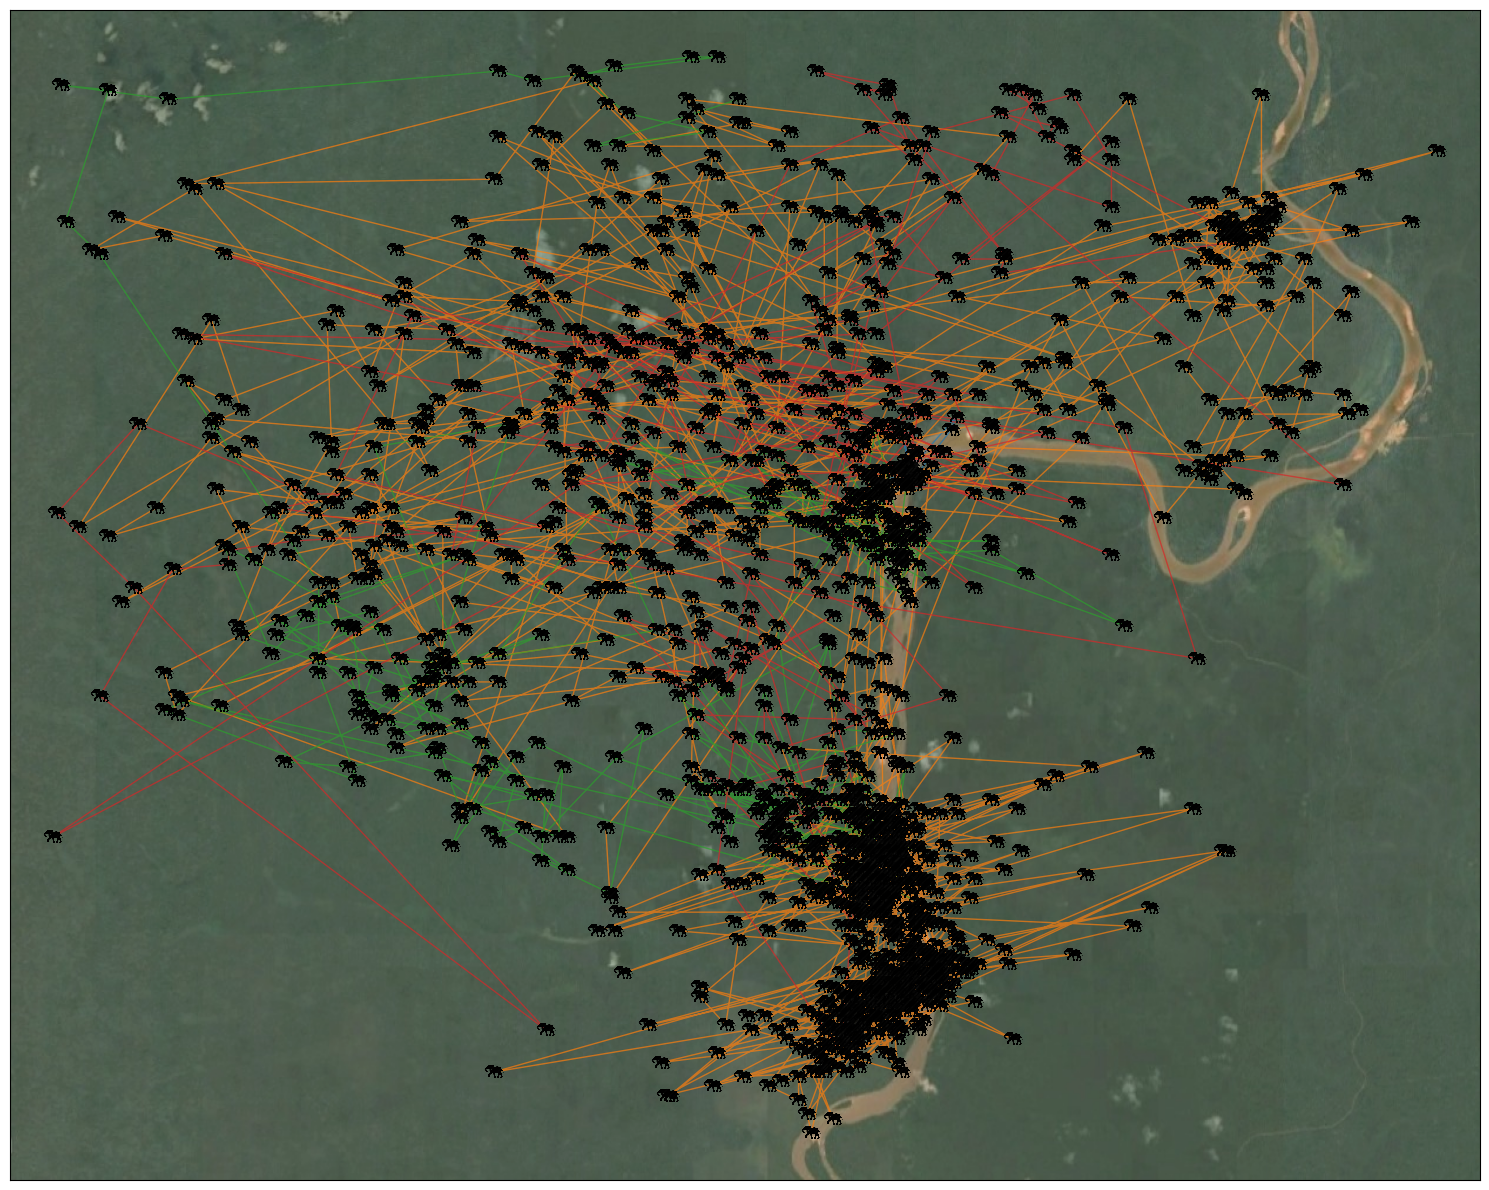

In [29]:
plot_elephant_movements(
    df_filtered,                      # DataFrame: must have ['animal_id', 'lat', 'long', 'timestamp']
    "lobeke.jpg",    # str: path to lobeke.png
    show_paths=True,          # bool: draw connecting paths
    fade_by_time=False,       # bool: fade points by recency
    use_elephant_icon=True,  # bool: use elephant image instead of dots
    elephant_icon_path="elephant2.png",  # str: path to elephant image if use_elephant_icon is True
    output_path="elephant_movements.pdf",  # str: output PDF file
    figsize=(15, 12)          # figure size
)